# IBM Data Science Capstone Project 

## Business Understanding

The aim of this study is to analyse the effect speciic parameters have on the severity of vehicular accidents and draw an understanding from machine learning models created. Ultimately the goal is to create a preventive mechanism to reduce the severity of accidents by quantifying the risk which drivers face based on their current location. 

## Target Audience

The target audience are the potential stakeholders that might be interested within this study. Potential scenarios have been laid out to aid the reader's understanding. 

- Government: They can identify parameters which are under their control such as road lighting condition that have the highest contribution to the severity of accidents. This will allow them to prioritize financial resources to improve the safety of the citizens

- Insurance Agencies: They can identify areas which are more prone to car accidents based on specific parameters and cater packages to ensure their clients protection

- Healthcare & First Responders: Identifying areas with high likelyhood of severe accidents can enable them to effectively position their ambulances and other vehicles to reduce road casualties

In the ideal scenario, the machine learning model will inform the general public of the potential risk they face with statistical backing.

## Data Understanding

The data set used for this report will be that provided by Coursera (Data-Collisions.csv). The specific attributes previously mentioned used for the machine learning model are as follow:

- SEVERITYCODE (quantifying the severity of the acccident)
- WEATHER (description of the weather conditions in a string format)
- ROADCOND (description of the road conditions in a string format)
- LIGHTCOND (description of the light conditions in a string format)

The selection of attributes highlight above was conducted in a way to achieve a holistic model. ROADCOND and LIGHTCOND are both parameters which are to some extent our control, while WEATHER is not a parameter within our control.

## Data Preparation

The first step within the data preparation will be to simplify the dataset by using only the required attributes (columns), as such all attributes from the original dataset will be removed.

In [1]:
#importing required packages 
import pandas as pd 
import numpy as np 
import sklearn as skl
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
#importing the dataset based on provided link 
URL = "https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv"
import_df = pd.read_csv(URL) #importing the entire dataset 

In [3]:
#selecting only desired attributes from dataframe 
df = import_df[['SEVERITYCODE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']]

### Data Cleaning

The next step is the cleaning up of the data, we will be removing all missing and unknonwn data from out dataframe

In [27]:
df.replace("", np.NaN, inplace=True)#replace all empty data points with Nan 
df.replace("Unknown", np.NaN, inplace=True) #replace all unknown data points with Nan 
df = df.dropna() #drop all rows containing Nan data points

Once completed we will ensure the code works by displaying the NaN variables within the df

In [5]:
df[df.isnull().any(axis=1)] #ensuring there are no Nan variables in our dataframe

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND


As shown above, an empty dataframe thereby proving it is in fact cleaned from those variables

### Data Type Consistency

When dealing with dataframes, we need to ensure our parameters are of the correct type prior to building our machine learning models. 

In [6]:
df.dtypes #parameters are of type object, which must be changed prior to proceeding

SEVERITYCODE     int64
WEATHER         object
ROADCOND        object
LIGHTCOND       object
dtype: object

As it can be observed above, three of our attributes are of the type 'object' which prevents us from conducting any numerical analysis on them. Label encoding will be used to assign numerical value to the three attributes and in doing so, create three new attributes 

In [7]:
#converting objects to type category for label encoding
weather_df = df["WEATHER"].astype('category')
roadcond_df = df["ROADCOND"].astype('category')
lightcond_df = df["LIGHTCOND"].astype('category')
weather_df = weather_df.cat.codes
roadcond_df = roadcond_df.cat.codes
lightcond_df = lightcond_df.cat.codes

In [8]:
#concat all dataframes into a single one 
horizontal_stack = pd.concat([df, weather_df, roadcond_df, lightcond_df], axis=1) 
df = horizontal_stack

#renaming the column headers to the appropriate name
df.columns = ['SEVERITYCODE', 'WEATHER', 'ROADCON', 'LIGHTCOND', 'WEATHER_CAT', 'ROADCOND_CAT', 'LIGHTCOND_CAT']
df.head()

,SEVERITYCODE,WEATHER,ROADCON,LIGHTCOND,WEATHER_CAT,ROADCOND_CAT,LIGHTCOND_CAT
0,2,Overcast,Wet,Daylight,4,7,5
1,1,Raining,Wet,Dark - Street Lights On,6,7,2
2,1,Overcast,Dry,Daylight,4,0,5
3,1,Clear,Dry,Daylight,1,0,5
4,2,Raining,Wet,Daylight,6,7,5


The three new attributes formed were WEATHER_CAT, ROADCOND_CAT and LIGHTCOND_CAT, which all hold numerical values based on the object they represent. 

### Data Balancing

The last step of the data preparation phase is to ensure that our dataset is balanced. 

1    114659
2     55851
Name: SEVERITYCODE, dtype: int64


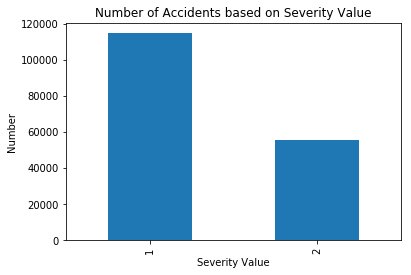

In [9]:
#checking frequency of each integer within SEVERITYCODE
print(df['SEVERITYCODE'].value_counts())
df_balance_check = df['SEVERITYCODE'].value_counts()
df_balance_check.plot(kind="bar")
plt.title('Number of Accidents based on Severity Value')
plt.xlabel('Severity Value')
plt.ylabel('Number')
plt.show()

As it can be observed from the bar chart above, our dataframe is not balanced. This can result into skewing of data and ultimately resulting into errors within our machine learning models. To avoid such inaccuracy we are required to balanced the dataframe.

In [10]:
#importing the required package for resampling
from sklearn.utils import resample  

Resample is a tool which allows us to resample our dataframe in a ramdom manner such that number of severity value = 1 match that of severity value = 2.

In [11]:
#creating new dataframes based on SEVERITYCODE
df_major = df[df.SEVERITYCODE==1]
df_minor = df[df.SEVERITYCODE==2]

#resampling df_major to the same size as that of df_minor
df_major_downsampled = resample(df_major, replace=False, n_samples=55851, random_state=13)

In [12]:
#concatenate both the dataframes into balanced dataframe
df_downsampled = pd.concat([df_major_downsampled, df_minor])

2    55851
1    55851
Name: SEVERITYCODE, dtype: int64


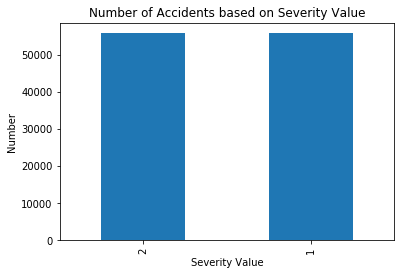

In [13]:
#ensuring the dataframe is balanced
print(df_downsampled.SEVERITYCODE.value_counts())
df_balance_check = df_downsampled.SEVERITYCODE.value_counts()
df_balance_check.plot(kind="bar")
plt.title('Number of Accidents based on Severity Value')
plt.xlabel('Severity Value')
plt.ylabel('Number')
plt.show()

As it can be observed from the bar chart above, the dataframe was successfully balanced completing the Data Preparation Stage. For simplicity's sake, we will assign df_downsampled into df to avoid confusion

In [14]:
#using df for simplicity
df = df_downsampled
df.shape

(111702, 7)

A final check is conducted to ensure the dataframe has the correct number of rows and columns.

## Modelling

Three classification algorithms will be used for the modeling section:
- K-Nearest Neighbors -> Method of classifying based on their similarity 
- Decision Trees -> Displays the outcome to each decision 
- Logistic Regression -> Classificaton algorithm based on categorical variables 


## Evaluation

### Evaluation Metrics

Two evaluation metrics will be used to assess the accuracy of our machine learning models

In [15]:
#importing the required library 
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score 

#Max parameter for loops will be set to an arbitrary value
max_loop = 26

### Initialization 

Initialisation is defining the X component and y component for our model building. The former consist of our three attributes; WEATHER_CAT, ROADCOND_CAT & LIGHTCOND_CAT, while the latter consist of our predictor SEVERITYCODE.

In [16]:
#Defining X and y
X = np.asarray(df[['WEATHER_CAT', 'ROADCOND_CAT','LIGHTCOND_CAT']]) 
y = np.asarray(df['SEVERITYCODE']) 

### Data Normalization

Data normalization is required to ensure the models are not skewed by variables with large magnitude. It is important to note that X was converted from type int to type float due to the normalization errors. Recall that an int divided by another int will result in rounding off to the nearest integer, which in this case will result into errors in our model.

In [17]:
#Import the required library 
from sklearn import preprocessing 

#X was converted to type float due to warning message when normalising int values.
X = X.astype(float)

#Normalizing dataset 
X = preprocessing.StandardScaler().fit(X).transform(X)

### Spliting Data into Train/Test

Train/Test Split approach was selected as an evaluation approach. 70% of the dataframe will be used for model building while the remaining 30% will be used to evaluate the model's accuracy based on the evaluation metrics mentioned above.

In [18]:
#import the required library 
from sklearn.model_selection import train_test_split

#Split the data into training and testing set
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3, random_state=4)
print("Train set: ", X_train.shape, y_train.shape)
print("Test set: ",X_test.shape, y_test.shape)

Train set:  (78191, 3) (78191,)
Test set:  (33511, 3) (33511,)


## Model Analysis

With the evaluation framework in place, we will proceed with the analysis of the three machine learning models. The analysis will operate in two stages. 

### K-Nearest Neighbors

In [19]:
#importing the required library
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#Looping across K parameter 
Ks = max_loop
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    #Train Model and Predict  
    KNNneigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    KNNyhat=KNNneigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, KNNyhat)
    std_acc[n-1]=np.std(KNNyhat==y_test)/np.sqrt(KNNyhat.shape[0])

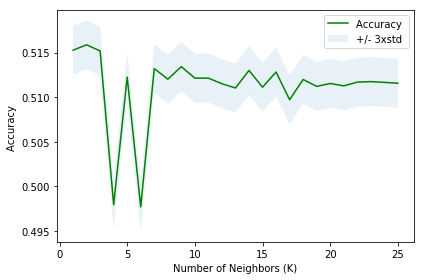

In [20]:
#plot the accuracy of the model with increments in K
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

As it can be observed from this graph, the accuracy of the model peaked at K=2. Subsequent increments to the K-value resulted into a plateau at K = 7. Having identified the optimum value of K for our KNN model, we will proceed with evaluating the model at that particular value of K.

In [21]:
#evaluation of the KNN model for k=2
neigh = KNeighborsClassifier(n_neighbors=2).fit(X_train,y_train)
yhat = neigh.predict(X_test)
#print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
#print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
KNN_f1_score = f1_score(y_test, yhat)
KNN_jaccard = jaccard_similarity_score(y_test,yhat)
print('F1-score: ',KNN_f1_score)
print('Jaccard Index: ', KNN_jaccard)

F1-score:  0.4295358649789029
Jaccard Index:  0.5158604637283281


### Decision Tree 

In [22]:
#importing the required library
from sklearn.tree import DecisionTreeClassifier

In [23]:
#Looping across the max depth parameter
max_param = max_loop
f1_param = 0

for i in range(1,max_param):
    dfTree = DecisionTreeClassifier(criterion = "entropy", max_depth = i)
    dfTree.fit(X_train, y_train)
    DTyhat = dfTree.predict(X_test)
    DT_jaccard = jaccard_similarity_score(y_test,DTyhat)
    DT_f1 = f1_score(y_test, DTyhat)
    if DT_f1 > f1_param:  
        f1_param = DT_f1
        jaccard_param = DT_jaccard
        optimum_depth = i
print("F1-score: ",f1_param)
print("Jaccard Index: ", jaccard_param)
print("Optimum value of max_depth: ", optimum_depth)

F1-score:  0.38213494307327883
Jaccard Index:  0.5174121930112501
Optimum value of max_depth:  2


### Logistic Regression

In [24]:
#importing the requires library 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

#setting the C parameter value 
C_param_range = [0.001, 0.01, 0.1, 1, 10, 100]

In [25]:
#Looping across different C parameter
LR_f1_optimum = 0

for n in C_param_range:
    LR = LogisticRegression(C=n, solver='sag').fit(X_train,y_train)
    LRyhat = LR.predict(X_test)
    yhat_prob = LR.predict_proba(X_test)
    LR_f1 = f1_score(y_test, LRyhat)
    LR_jaccard = jaccard_similarity_score(y_test,LRyhat)
    #LR_log = log_loss(y_test, yhat_prob)
    if LR_f1_optimum < LR_f1:
        LR_f1_optimum = LR_f1
        LR_jaccard_optimum = LR_jaccard
        optimum_N = n
print("F1-score: ",LR_f1_optimum)
print("Jaccard Index: ", LR_jaccard_optimum)
print("Optimum N: ", optimum_N)

F1-score:  0.3851143735063161
Jaccard Index:  0.5163080779445555
Optimum N:  0.01


## Discussion

The evaluation of the three models reflect an accuracy of approximately 51% as reflected by their Jaccard Index. Despite optimizing the respective models to their optimum parameters the accuracy of the test-set still fell short of desirable values. The percentage reflected barely crosses the midway point and signifies a relatively low similarity index between the predicted values based on our model and the actual values from the test set. The other metric used for evaluation was the F1-score, here again the evaluation results are rather poor with the highest F1-score in KNN method being 42.9%. Reflecting the models' accuracy on the dataset, landing below 50% signifies very poor accuracy of our models.  

## Conclusion


One of the common reasons for poor F1-score is due to unbalanced dataset, which is not the case here as it was previous taken care of. Overall the accuracy of the models built are under the desirable levels which are in the 70% range. A potential improvement for the model building will be the inclusion of additional attributes which might provide more accurate insight. In conclusion further improvement are required to provide any useful information to our target audience. 